In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy import stats, integrate
from Bio import SeqIO
from PIL import Image

In [22]:
# 设置绘图风格
# sns.set_style("ticks", rc={"xtick.direction": "in", "ytick.direction": "in", "ytick.major.pad": 1})
# 处理中文乱码
# plt.rcParams['font.sans-serif'] = ['Arial']
# 坐标轴负号的处理
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'text.usetex': False})

# 设置百分比格式
def to_percent(y, position):
    return '{:.0f}%'.format(y)

In [23]:
result_denovo_2_gfp = pd.read_csv('UTR_data/GFP_denovo_endogenous_experiment_data.csv')
print("utr number is: ", len(result_denovo_2_gfp))
result_denovo_2_gfp.head()

utr number is:  40


,No,seq,FITC+%,MFI,round1,FITC+%.1,MFI.1,round2,FITC+%.2,MFI.2,...,pred_optimus,pred_frame_pool,pred_mrl,group,source,hue,hue_2,vs_HBB,uAUG,uAUG.1
0,hHBA,2,0.9851,688405.9,1,0.9866,751445.8,2,0.9855,733531.8,...,7.231738091,7.431622,7.336878,Positive control,Endogenous,Positive control,Positive control,1.000000,No,0
1,UTR_r2_1,3,0.9827,660489.3,1,0.9897,765657.2,2,0.9857,768693.1,...,7.879245281,8.641747,8.164041,Experiment,Endogenous,Endogenous,Top MRL,1.009872,No,0
2,UTR_r2_2,4,0.9695,713857.6,1,0.9891,822719.4,2,0.9900,841421.1,...,7.395412445,8.555467,8.222001,Experiment,Endogenous,Endogenous,Top MRL,1.094146,No,0
3,UTR_r2_3,5,0.9844,878907.5,1,0.9888,937874.3,2,0.9911,1041648.5,...,7.86156702,8.515055,8.213515,Experiment,Endogenous,Endogenous,Top MRL,1.315198,No,0
4,UTR_r2_4,6,0.9847,731059.8,1,0.9859,762228.5,2,0.9861,713963.3,...,7.555299282,8.480379,8.151737,Experiment,Endogenous,Endogenous,Top MRL,1.015583,No,0


In [24]:
result_denovo_2_gfp.columns

Index(['No', 'seq', 'FITC+%', 'MFI', 'round1', 'FITC+%.1', 'MFI.1', 'round2',
       'FITC+%.2', 'MFI.2', 'round3', 'MFI_avg', 'MFI_std', 'spe', 'utr',
       'len', 'pred_optimus', 'pred_frame_pool', 'pred_mrl', 'group', 'source',
       'hue', 'hue_2', 'vs_HBB', 'uAUG', 'uAUG.1'],
      dtype='object')

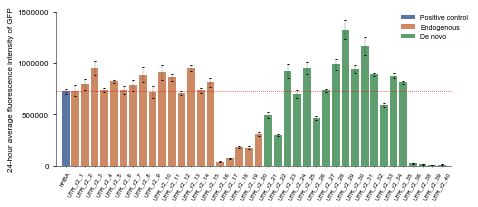

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置字体为 Times New Roman，并设置字体大小为 8 磅（points）
plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.size'] = 8

# 根据 'live Mean FITC-A_24H' 列的值排序
# result_1_gfp_sorted = result_denovo_2_gfp.sort_values(by='live Mean FITC-A_24H', ascending=False)

# 设置图形大小
# 调整图的大小，单位为英寸，下面提供三种不同版式的尺寸设置
# 选择单栏图
# fig_width = 8.5 / 2.54  # 单栏图 8.5 cm = 3.35 英寸
# 选择 1.5 栏图
# fig_width = 12.0 / 2.54  # 1.5 栏图 12 cm = 4.72 英寸
# 选择双栏图
fig_width = 18.0 / 2.54  # 双栏图 18 cm = 7.09 英寸

# 设置图的高度，SCI投稿官网没有具体要求，这里设定为合适的比例
fig_height = fig_width * 0.4  # 高度为宽度的0.75倍
plt.figure(figsize=(fig_width, fig_height))

# 创建带有误差棒的柱状图
sns.barplot(x='No', y='MFI_avg', data=result_denovo_2_gfp, hue='hue', dodge=False, palette='deep', linewidth=0.0, order=result_denovo_2_gfp['No'])

# 添加误差棒
plt.errorbar(x=range(len(result_denovo_2_gfp)), y=result_denovo_2_gfp['MFI_avg'], yerr=result_denovo_2_gfp['MFI_std'], fmt='none', c='black', capsize=1.2, elinewidth=0.2)

# 设置x轴和y轴标签
plt.xlabel('', fontsize=6)
plt.ylabel('24-hour average fluorescence intensity of GFP', fontsize=8)

# 设置y轴的范围
plt.ylim(0, 45000)

# 设置x轴的范围
plt.xlim(-1, len(result_denovo_2_gfp)+0)

# 设置轴的线宽
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

# 隐藏右边和上面的脊柱
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 设置x轴和y轴标签的字体大小
plt.xticks(fontsize=8, rotation=60, ha='center')
# 设置y轴刻度间隔为10000
plt.yticks(range(0, 1500001, 500000), fontsize=8)

# 显示刻度线
plt.tick_params(axis='x', direction='out', length=1, width=0.5, labelsize=6)

# 添加水平辅助线
hHBA_mean = result_denovo_2_gfp[result_denovo_2_gfp['No'] == 'hHBA']['MFI_avg'].mean()
plt.axhline(y=hHBA_mean, color='red', linestyle=':', linewidth=0.75)

# 添加标题
# plt.title('GFP-293T', fontsize=20)

# 修改图例
legend = plt.legend(fontsize=7, title=None, loc='upper right', bbox_to_anchor=(1.05, 1), borderaxespad=0)  # 去掉图例标题并设置字体大小
legend.get_frame().set_linewidth(0.1)  # 设置图例边框的线宽

# # 保存图像为高质量PDF文件
# plt.savefig('result_3/barplot_gfp_24h_1.pdf', dpi=300, bbox_inches='tight')

# # 保存图像为高质量SVG文件
# plt.savefig('result_3/barplot_gfp_24h_1.svg', bbox_inches='tight')

# Save the plot as a high-quality PNG image first
# plt.savefig('result_3/barplot_gfp_24h_1.png', dpi=600, bbox_inches='tight')

# Then, use Pillow to convert the PNG image to TIFF format
# png_image = Image.open('result_3/barplot_gfp_24h_1.png')
# png_image.save('result_3/barplot_gfp_24h_1.tiff', dpi=(600, 600), compression='tiff_lzw')

# 保存为 SVG 格式
plt.savefig('result_5/barplot_denovo_gfp_24h_1.svg', format='svg', bbox_inches='tight')

# 显示图像
plt.show()
